# OCR SYSTEM

#### Import Libraries

In [26]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#### Import sample images

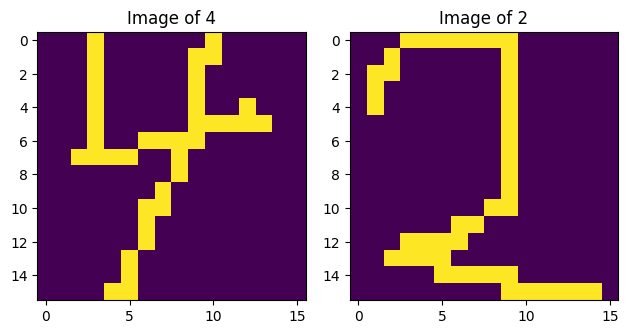

In [27]:
img2=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,
1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,
0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

img4=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,
0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
0,0,0,0,0,0,0,0,0,0,0,0,0],dtype=np.uint8)

img = np.reshape(img4,(16,16),order= 'F')
img1 = np.reshape(img2,(16,16),order= 'F')

fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[0].set_title('Image of 4')
axes[1].imshow(img1)
axes[1].set_title('Image of 2')

plt.tight_layout()

plt.show()

## Import Data from the Files

#### Training Data

In [28]:
#Your code here
train_x = np.loadtxt("trainX.txt")
train_y = np.loadtxt("trainY.txt")
print(train_x.shape)
print(train_y.shape)

(500, 256)
(500,)


Expected Output <br>
- Shape of X_train : (500, 256) <br>
- Shape of y_train : (500,)

### Testing Data

In [29]:
#Your code here
test_x = np.loadtxt("testX.txt")
test_y = np.loadtxt("testY.txt")
print(test_x.shape)
print(test_y.shape)

(100, 256)
(100,)


Expected Output <br>
- Shape of X_train : (100, 256) <br>
- Shape of y_train : (100,)


### Dividing Data W.R.T its Classes

##### Training Data

In [30]:
#AS we know first 250 images are of 2 so we will take first 250 images from X_train
#your code here
img2_X_train = train_x[:250]
img4_X_train = train_x[250:]

##### Another way
You can coment the below code if you dont want to try this effective way and will use the above code to divide the data into classes

In [31]:
#But in case if we didn't know that first 250 images are of 2 then we can use this code
#This img2_X_train will contain only only those images from X_train which have corespondong label of 2 in Y_train
# img2_X_train = 
# img4_X_train = 
print(img2_X_train.shape)
print(img4_X_train.shape)

(250, 256)
(250, 256)


Expected Output <br>
- Shape of X_train : (250, 256) <br>
- Shape of y_train : (250, 256)


##### Testing Data

In [32]:
# Your code here

img2_X_test = test_x[:50]
img4_X_test = test_x[50:]
print(img2_X_test.shape)
print(img4_X_test.shape)

(50, 256)
(50, 256)


Expected Output <br>
- Shape of X_train : (50, 256) <br>
- Shape of y_train : (50, 256)


### Finding the Probabilities

### Training Data

##### Probabailty of 1s and 0s

In [33]:
img2_one_prob = ((img2_X_train.sum(axis=0)) + 1)/(len(img2_X_train) + 2)  # applying add one smoothing
img2_zero_prob = 1 - img2_one_prob
img4_one_prob = ((img4_X_train.sum(axis=0)) + 1)/(len(img4_X_train) + 2)
img4_zero_prob = 1 - img4_one_prob

print(img2_one_prob.shape)
print(img2_zero_prob.shape)
print(img4_one_prob.shape)
print(img4_zero_prob.shape)

(256,)
(256,)
(256,)
(256,)


Expected Output <br>
- (256,)
- (256,)
- (256,)
- (256,)


#### Class Probabilities

In [40]:
# Your code here
prob_2 = len(train_y[:250])/len(train_y)
prob_4 = len(train_y[250:])/len(train_y)
print(prob_2)
print(prob_4)

0.5
0.5


#### Predictions

In [44]:
# Your code here
# axis = 1 means we are taking product of each row
# select probability form one and zero array based on the value of train_x using where clause
pred_2 = np.array(np.prod(np.where(train_x == 1, img2_one_prob, img2_zero_prob), axis=1)*prob_2)
pred_4 = np.array(np.prod(np.where(train_x == 1, img4_one_prob, img4_zero_prob), axis=1)*prob_4)
predictions_train = np.where(pred_2 > pred_4, 2, 4)
predictions_train


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

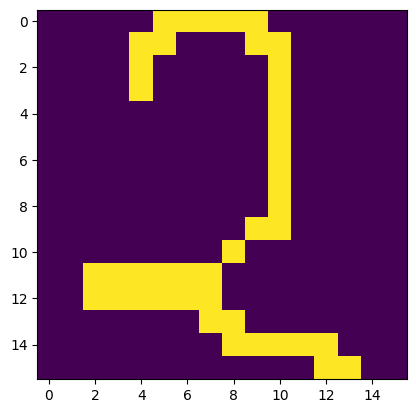

In [38]:
img = np.reshape(test_x[9],(16,16),order= 'F')
plt.imshow(img)
plt.show()

#### Overall Accuracy

In [52]:
# Your code here
TN = predictions_train[(predictions_train == 2) & (predictions_train == train_y)]
print("Actual:2 | Pred:2 -->",len(TN))
TP = predictions_train[(predictions_train == 4) & (predictions_train == train_y)]
print("Actual:4 | Pred:4 -->",len(TP))
FN = predictions_train[(predictions_train == 2) & (predictions_train != train_y)]
print("Actual:4 | Pred:2 -->",len(FN))
FP = predictions_train[(predictions_train == 4) & (predictions_train != train_y)]
print("Actual:2 | Pred:4 -->",len(FP))

overall_Accuracy = (len(TP) + len(TN))/len(train_y)
print("\nOverall Accuracy = ", overall_Accuracy)

Actual:2 | Pred:2 --> 246
Actual:4 | Pred:4 --> 248
Actual:4 | Pred:2 --> 2
Actual:2 | Pred:4 --> 4

Overall Accuracy =  0.988


Expected Output 
<br><br>
**Confusion Matrix**
<br>
TP =  248 	FP =  4
<br>
FN =  2 	TN =  246
<br>
- Overall Accuracy =  0.988

#### Classwise Accuracy

In [53]:
# Your code here
class2_train_total_accuracy = len(TN)/250
class4_train_total_accuracy = len(TP)/250

print("Total accuracy of Training data given class 2: ", class2_train_total_accuracy)
print("Total accuracy of Training data given class 4: " , class4_train_total_accuracy)

Total accuracy of Training data given class 2:  0.984
Total accuracy of Training data given class 4:  0.992


Expected Output <br>

- Total accuracy of Training data given class 2:  0.984
<br>
- Total accuracy of Training data given class 4:  0.992

### FOR TESTING DATA

##### Probabailty of 1s and 0s

In [54]:
img2_one_prob = ((img2_X_test.sum(axis=0)) + 1)/(len(img2_X_test) + 2)
img2_zero_prob = 1 - img2_one_prob
img4_one_prob = ((img4_X_test.sum(axis=0)) + 1)/(len(img4_X_test) + 2)
img4_zero_prob = 1 - img4_one_prob

print(img2_one_prob.shape)
print(img2_zero_prob.shape)
print(img4_one_prob.shape)
print(img4_zero_prob.shape)

(256,)
(256,)
(256,)
(256,)


#### Class Probabilities

In [55]:
# your code here
prob_2 = len(test_y[:50])/len(test_y)
prob_4 = len(test_y[50:])/len(test_y)
print(prob_2)
print(prob_4)

0.5
0.5


#### Predictions

In [56]:
# your code here
pred_2 = np.array(np.prod(np.where(test_x == 1, img2_one_prob, img2_zero_prob), axis=1)*prob_2)
pred_4 = np.array(np.prod(np.where(test_x == 1, img4_one_prob, img4_zero_prob), axis=1)*prob_4)
predictions_test = np.where(pred_2 > pred_4, 2, 4)
predictions_test




array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

#### Classwise Accuracy

In [58]:
# your code here
class2_test_total_accuracy = len(predictions_test[(predictions_test == 2) & (predictions_test == test_y)])/50
class4_test_total_accuracy = len(predictions_test[(predictions_test == 4) & (predictions_test == test_y)])/50






print("Total accuracy of Testing data given class 2: ", class2_test_total_accuracy)
print("Total accuracy of Testing data given class 4: ", class4_test_total_accuracy)

Total accuracy of Testing data given class 2:  1.0
Total accuracy of Testing data given class 4:  1.0


Expected Output <br>

- Total accuracy of Testing data given class 2:  1.0
<br>
- Total accuracy of Testing data given class 4:  1.0

#### Overall Accuracy

In [57]:
# your code here 
TN = predictions_test[(predictions_test == 2) & (predictions_test == test_y)]
print("Actual:2 | Pred:2 -->",len(TN))
TP = predictions_test[(predictions_test == 4) & (predictions_test == test_y)]
print("Actual:4 | Pred:4 -->",len(TP))
FN = predictions_test[(predictions_test == 2) & (predictions_test != test_y)]
print("Actual:4 | Pred:2 -->",len(FN))
FP = predictions_test[(predictions_test == 4) & (predictions_test != test_y)]
print("Actual:2 | Pred:4 -->",len(FP))

overall_Accuracy = (len(TP) + len(TN))/len(test_y)
print("\nOverall Accuracy = ", overall_Accuracy)


Actual:2 | Pred:2 --> 50
Actual:4 | Pred:4 --> 50
Actual:4 | Pred:2 --> 0
Actual:2 | Pred:4 --> 0

Overall Accuracy =  1.0


Expected Output 
<br><br>
**Confusion Matrix**
<br>
TP =  50 	FP =  0
<br>
FN =  0 	TN =  50
<br>
- Overall Accuracy =  1.0

### Plot your Test pixels/features in form of image to correctly identify whether our model is giving correct results

2 plots for each class

Your Oppinion on the results about why naive bayes worked well for  this OCR
and give one example where naive bayes can not be used


Solution :